### Домашнее задание к лекции «Алгоритмы кластеризации»

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
df = pd.read_excel("geo.xlsx")
df.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     108806 non-null  int64  
 1   x              108806 non-null  float64
 2   y              108806 non-null  float64
 3   comment_class  108806 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


In [4]:
# Все данные дискретные и без пропусков, отлично

In [5]:
# Колонку 'Unnamed: 0' очень похожа на индекс 
df.tail()

,Unnamed: 0,x,y,comment_class
108801,108801,37.454528,55.792331,-1
108802,108802,37.384325,55.899068,-1
108803,108803,37.421066,55.848756,1
108804,108804,37.448509,55.793065,-1
108805,108805,37.451249,55.836620,-1


In [6]:
# ну да, как видим это индекс, поэтому удалим из данных, он нам не нужен

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Выделение на районы

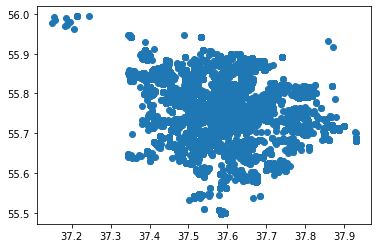

In [8]:
# Для начала посмотрим на данные в целом
plt.scatter(df['x'], df['y'])

In [9]:
# Найдем омтипальное чило кастеров

In [10]:
k_inertia = []
ks = range(1,16)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df[['x', 'y']])
    k_inertia.append(clf_kmeans.inertia_)

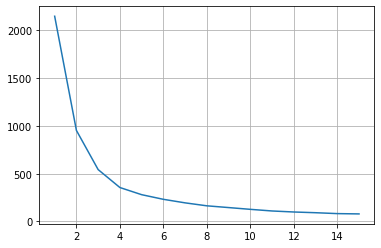

In [11]:
plt.plot(ks, k_inertia)
plt.grid()

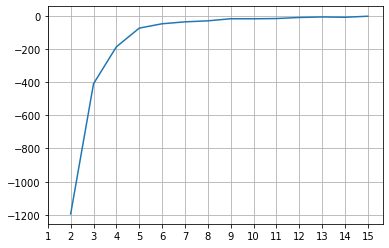

In [12]:
# Посмотрим на замедление
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)
plt.xticks(list(range(1,16)))
plt.grid()
plt.show()

In [13]:
# Оптимальное число выберу 5, мне кажется оно самое подходящее

In [14]:
clf_kmeans = KMeans(n_clusters=5)
clusters = clf_kmeans.fit_predict(df[['x', 'y']])

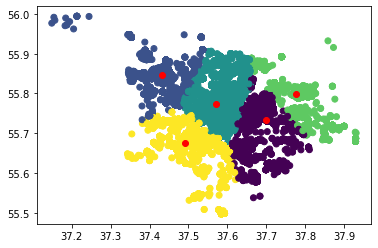

In [15]:
centers = clf_kmeans.cluster_centers_
plt.scatter(df['x'], df['y'], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='red')
plt.show()

In [16]:
# Посмотрим на метрику качества
# print(f'silhouette_score:  ', silhouette_score(df[['x', 'y']], clusters))
print(f'adjusted_rand_score:  ', adjusted_rand_score(df['y'], clusters))

adjusted_rand_score:   0.10894313854733102


In [17]:
# Метрика "силуэт" повисает у меня намертво..

Посмотрим кластеризацию для голосов за и против отдельно

In [18]:
# Разобем на два датасета и сделаем тоже самое
df_yes = df[df['comment_class'] == 1]
df_no = df[df['comment_class'] == -1]

ЗА:

In [19]:
k_inertia = []
ks = range(1,21)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_yes[['x', 'y']])
    k_inertia.append(clf_kmeans.inertia_)

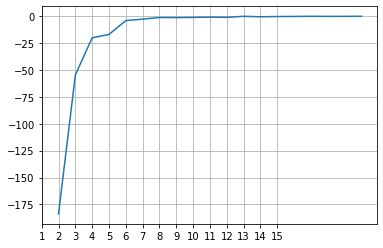

In [20]:
# Посмотрим на замедление
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)
plt.xticks(list(range(1,16)))
plt.grid()
plt.show()

In [21]:
# Оптимальное число для скопления голосов ЗА выберу 6, мне кажется оно самое подходящее

In [22]:
clf_kmeans = KMeans(n_clusters=6)
clusters = clf_kmeans.fit_predict(df_yes[['x', 'y']])

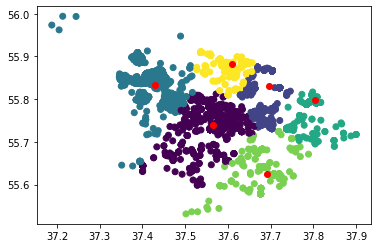

In [23]:
centers = clf_kmeans.cluster_centers_
plt.scatter(df_yes['x'], df_yes['y'], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='red')
plt.show()

ПРОТИВ

In [24]:
k_inertia = []
ks = range(1,16)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_no[['x', 'y']])
    k_inertia.append(clf_kmeans.inertia_)

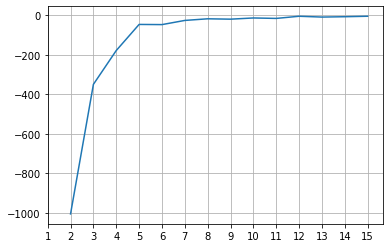

In [25]:
# Посмотрим на замедление
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)
plt.xticks(list(range(1,16)))
plt.grid()
plt.show()

In [26]:
# Оптимальное число для скопления голосов ПРОТИВ выберу 5, мне кажется оно самое подходящее

In [27]:
clf_kmeans = KMeans(n_clusters=5)
clusters = clf_kmeans.fit_predict(df_no[['x', 'y']])

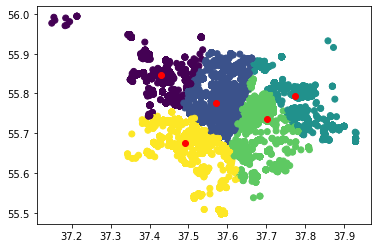

In [28]:
centers = clf_kmeans.cluster_centers_
plt.scatter(df_no['x'], df_no['y'], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='red')
plt.show()

Судя по графикам разбиение на кластеры одинаковое, что общее, что в разрезе голосов ЗА и ПРОТИВ, а значит голование проходио равномерно по всем районам